# C5_S5

# Task 1

In [1]:
mean = 1332
SD  = 725

# Task 1a

In [2]:
a = 2000
z_score = (a-mean)/SD
print("Z_score is "+str(z_score))

Z_score is 0.9213793103448276


In [3]:
from scipy.stats import norm

pvalue = norm.cdf(z_score)
print(round(pvalue,3))

0.822


Inorder To find the proportion of the tax returns which is  greater than 2000 USD
We remove 0.822 from 1 from which it is the total area under the curve.

Probability of x > 2000 = 1 – 0.822 = 0.178

Hence it’s likely that only 17.8% ie 18% proportion of tax returns
And it is are than 2000 USD.

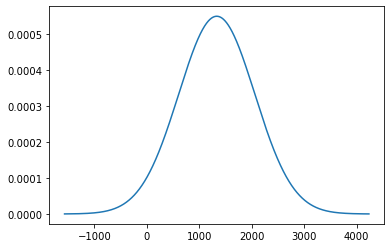

In [4]:
import matplotlib.pyplot as plt
import numpy as np

L= mean-4*SD
U = mean+4*SD

normlimit = np.arange(L,U)
plt.plot(normlimit, norm.pdf(normlimit, mean, SD))

# Task 1b

In [5]:
x = 0

M = 1332
SD = 725

z = (x-M)/SD

print("z_score of x=0 is ="+str(z))

print("\nThe probability associated with z="+str(z) +" is " +str(norm.cdf(z)))

z_score of x=0 is =-1.8372413793103448

The probability associated with z=-1.8372413793103448 is 0.03308713475892688


# Ans: Probability of that a taxpayer = 3.309%

# Task 1c

In [6]:
from scipy.stats import norm

a1 = 100
a2 = 700

M = 1332
SD = 725

b1=(a1-mean)/SD
b2=(a2-mean)/SD

print("z_score of $100 is ="+str(b1))
print("z_score of $700 is ="+str(b2))

print("\nThe probability associated with z="+str(b1) +" is " +str(norm.cdf(b1)))
print("The probability associated with z="+str(b2) +" is " +str(norm.cdf(b2)))

print("\nThe proportion of tax returns between 100 USD and 700 USD ",
      norm.cdf(b2)-norm.cdf(b1))

z_score of $100 is =-1.6993103448275861
z_score of $700 is =-0.8717241379310345

The probability associated with z=-1.6993103448275861 is 0.04463036222315338
The probability associated with z=-0.8717241379310345 is 0.19167944440584644

The proportion of tax returns between 100 USD and 700 USD  0.14704908218269308


# Ans:Probability of x between 100 and 700 of the p_value2 - p_value1 = 14.70%

# Task 2

In [7]:
import pandas as pd

Data = pd.read_csv("DS1_C5_S5_Continuous_Practice_Computers_Data.csv")
Data

,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [9]:
grouped=Data.groupby(['screen']) #group the data with respect to categories of screens
screens=Data.screen.unique() #retrieve unique Screens
Strat_Sample_df=pd.DataFrame()

for s in screens:
    s_data=grouped.get_group(s) #retrieve data of the specific category of screen
    sample_data=s_data.sample(n=50, random_state=1, replace=True) #reteive 50% sample of from each category of gender
    Strat_Sample_df=Strat_Sample_df.append(sample_data, ignore_index=True) #append rows to dataframe
    
print(Strat_Sample_df)

     index  price  speed   hd  ram  screen   cd multi premium  ads  trend
0     1518   1644     33  107    2      14   no    no     yes  283     10
1      317   2399     66  120    4      14   no    no     yes  108      4
2     1563   2374     33  120    4      14  yes    no      no  283     10
3     1292   1790     33  107    2      14   no    no     yes  246      9
4     4229   2015     66  425    8      14  yes   yes     yes  225     19
..     ...    ...    ...  ...  ...     ...  ...   ...     ...  ...    ...
145    439   3055     50  250    8      17   no    no     yes  139      5
146   4238   1798     33  340    4      17   no    no     yes  225     19
147   3870   2688     33  212    4      17   no    no      no  273     18
148   5451   1838     50  428    4      17  yes   yes     yes  152     26
149    221   2635     33  250    8      17   no    no     yes  100      3

[150 rows x 11 columns]


In [15]:
import statistics as st

data=Strat_Sample_df['price'].tolist()
 
mean = st.mean(data) 
median = st.median(data) 

print("Sample Mean ="+str(mean)) 
print("Sample Median ="+str(median))

Sample Mean =2351.193333333333
Sample Median =2224.5


In [17]:
data=Data['price'].tolist()

mean = st.mean(data) 
median = st.median(data) 

print("Population Mean ="+str(mean)) 
print("Population Median ="+str(median))

Population Mean =2219.576609682058
Population Median =2144


In [19]:
import statistics as st
import math

#SD
p_sd = st.stdev(data)
s_sd = st.stdev(data)
s_sd_f_p=p_sd/math.sqrt(len(data))
print("Population SD ="+str(p_sd))
print("Sample SD from Population SD="+str(s_sd_f_p))
print("Sample SD ="+str(s_sd))

Population SD =580.8039556527063
Sample SD from Population SD=7.341369610986166
Sample SD =580.8039556527063


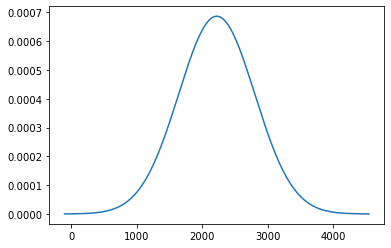

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

lower=mean-4*p_sd
upper=mean+4*p_sd

norm_p=np.arange(lower,upper)
plt.plot(norm_p, norm.pdf(norm_p, mean, p_sd))

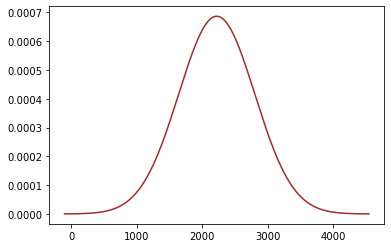

In [22]:
lower=mean-4*s_sd
upper=mean+4*s_sd

norm_s=np.arange(lower,upper)
plt.plot(norm_s, norm.pdf(norm_s, mean, s_sd), color="brown")

# Task 2(1)

In [ ]:
from scipy.stats import norm

x = 4000

s_mean = 2351.1933
s_sd = 581.3993

z = (x-s_mean)/s_sd

print("z-score of $4000 is = "+str(z))

print("The probability associated with z="+str(z) +" is " +str(norm.cdf(z)))

# Task 2(2)

In [14]:
from scipy.stats import norm

x = 0

mean = 2351.1933
sd = 581.3993

z = (x-mean)/sd

print("z-score of $4000 is = "+str(z))

print("The probability associated with z="+str(z) +" is " +str(norm.cdf(z)))

z-score of $4000 is = -4.044024992806149
The probability associated with z=-4.044024992806149 is 2.6270657330602077e-05


# Task 2(3)1

In [13]:
from scipy.stats import norm

x = 2700

mean = 2351.1933
sd = 581.3993

z = (x-mean)/sd

print("z-score of $2700 is = "+str(z))

value = norm.cdf(z)
print("\nThe probability associated with z="+str(z) +" is " +str(value))

print("\nThe probability that computers' prices in the sample are greater than 2700 USD:")
print("P = 1 - value = "+str(round((1-value)*100,2))+" %")

z-score of $2700 is = 0.5999434467843358

The probability associated with z=0.5999434467843358 is 0.7257280370073785

The probability that computers' prices in the sample are greater than 2700 USD:
P = 1 - value = 27.43 %


# Task 2(3)2

In [12]:
from scipy.stats import norm

x = 1301

mean = 2351.1933
sd = 581.3993

z = (x-mean)/sd

print("z-score of $1301 is = "+str(z))

value = norm.cdf(z)
print("\nThe probability associated with z="+str(z) +" is " +str(value))

print("\nThe probability that computers' prices in the sample are less than 1301 USD:")
print("P = value = "+str(round(value*100,2))+" %")

z-score of $1301 is = -1.8063202002479188

The probability associated with z=-1.8063202002479188 is 0.03543416915675345

The probability that computers' prices in the sample are less than 1301 USD:
P = value = 3.54 %


# Task 2(3)3

In [11]:
from scipy.stats import norm

x1 = 2000
x2 = 2900

mean = 2351.1933
sd = 581.3993

z1 = (x1-mean)/sd
z2 = (x2-mean)/sd

print("z1-score of $2000 is = "+str(z1))
print("z2-score of $2900 is = "+str(z2))

p1value = norm.cdf(z1)
p2value = norm.cdf(z2)
print("\nThe probability associated with z1="+str(z1) +" is " +str(p1value))
print("\nThe probability associated with z2="+str(z2) +" is " +str(p2value))

print("\nThe probability that computers' prices in the sample are between 2000 USD and 2900 USD:")
print("P = p2value - p1value = "+str(round((p2value - p1value)*100,2))+" %")

z1-score of $2000 is = -0.6040483708872713
z2-score of $2900 is = 0.9439411089762235

The probability associated with z1=-0.6040483708872713 is 0.27290574171731397

The probability associated with z2=0.9439411089762235 is 0.8274001283908419

The probability that computers' prices in the sample are between 2000 USD and 2900 USD:
P = p2value - p1value = 55.45 %
